In [1]:
import pandas as pd
import  sys 
sys.path.append("../src/")
import data_preparation as dp
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_15414/4060298853.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("../data/train.csv")
/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_15414/4060298853.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv("../data/test.csv")


In [3]:
dataprep = dp.DataPreparation(df_train, df_test)
clean_train, clean_test = train_clean, test_clean = dataprep.prepare_data()

Valeurs manquantes du train supprimées ✅
Valeurs manquantes du test supprimées ✅
Variables renommées ✅
Valeurs manquantes numériques imputées ✅
Valeurs manquantes catégorielles imputées ✅


In [4]:
clean_train.columns

Index(['ID', 'Country', 'VFN', 'Mh', 'Man', 'Tan', 'T', 'Va', 'Ve', 'Mk', 'Cn',
       'Ct', 'Cr', 'm_(kg)', 'Mt', 'Ewltp_(g/km)', 'W_(mm)', 'At1_(mm)',
       'At2_(mm)', 'Ft', 'Fm', 'ec_(cm3)', 'ep_(KW)', 'Fuel_consumption_',
       'Electric_range_(km)'],
      dtype='object')

In [5]:
clean_train.dtypes

ID                       int64
Country                 object
VFN                     object
Mh                      object
Man                     object
Tan                     object
T                       object
Va                      object
Ve                      object
Mk                      object
Cn                      object
Ct                      object
Cr                      object
m_(kg)                 float64
Mt                     float64
Ewltp_(g/km)           float64
W_(mm)                 float64
At1_(mm)               float64
At2_(mm)               float64
Ft                      object
Fm                      object
ec_(cm3)               float64
ep_(KW)                float64
Fuel_consumption_      float64
Electric_range_(km)    float64
dtype: object

In [6]:
clean_train["Man"].unique()

array(['FORD WERKE GMBH', 'VOLKSWAGEN AG', 'KIA SLOVAKIA SRO',
       'SKODA AUTO AS', 'MERCEDES-BENZ AG',
       'NISSAN AUTOMOTIVE EUROPE SAS', 'DR ING HCF PORSCHE AG',
       'FCA ITALY SPA', 'TOYOTA MOTOR EUROPE NV SA', 'AUDI AG',
       'OPEL AUTOMOBILE GMBH', 'AUTOMOBILES PEUGEOT',
       'PSA AUTOMOBILES SA', 'HONDA MOTOR CO LTD',
       'TOYOTA MOTOR CORPORATION', 'AA-IVA', 'ALFA ROMEO SPA',
       'FCA US LLC', 'MAZDA MOTOR CORPORATION', 'SUBARU CORPORATION',
       'MITSUBISHI MOTORS THAILAND CO LTD',
       'MAZDA MOTOR LOGISTICS EUROPE NV', 'BAYERISCHE MOTOREN WERKE AG',
       'MAGYAR SUZUKI CORPORATION LTD', 'AUTOMOBILE DACIA SA', 'SEAT SA',
       'VOLVO CAR CORPORATION', 'BMW M GMBH', 'AUTOMOBILES CITROEN',
       'HYUNDAI ASSAN OTOMOTIV SANAYI VE TICARET AS',
       'HYUNDAI MOTOR COMPANY', 'HYUNDAI MOTOR MANUFACTURING CZECH SRO',
       'KIA CORPORATION', 'JAGUAR LAND ROVER LIMITED', 'RENAULT SAS',
       'FORD MOTOR COMPANY', 'BENTLEY MOTORS LTD', 'TESLA INC',
      

## Prédictions avec une RF
Métrique à minimiser : MAE \
Variable cible : Ewltp 

## Etape 1 : recherche des meilleures variables explicatives

### 1.1 : Encodage des variables catégorielles --> label encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cat_col = clean_train.select_dtypes(include=['object'])
for col in cat_col:
    clean_train[col] = encoder.fit_transform(clean_train[col])

In [9]:
clean_train.head()

,ID,Country,VFN,Mh,Man,Tan,T,Va,Ve,Mk,...,Ewltp_(g/km),W_(mm),At1_(mm),At2_(mm),Ft,Fm,ec_(cm3),ep_(KW),Fuel_consumption_,Electric_range_(km)
0,0,5,5077,33,35,4277,493,4228,1708,173,...,401.053306,2700.0,1571.0,1576.0,8,3,999.0,92.0,5.6,0.0
1,1,10,7147,92,100,3407,340,1213,10312,651,...,394.684459,2552.0,1500.0,1483.0,8,4,999.0,70.0,5.5,0.0
2,2,10,7136,92,100,3407,340,1213,8318,651,...,398.561951,2552.0,1500.0,1483.0,8,4,999.0,70.0,5.6,0.0
3,3,5,2393,47,49,5311,432,1719,6417,340,...,479.470056,2650.0,1555.0,1563.0,8,4,1591.0,150.0,6.8,0.0
4,4,10,7170,92,100,3407,340,1211,8325,651,...,421.854820,2552.0,1500.0,1483.0,8,4,999.0,81.0,5.9,0.0


### 1.2 : corrélation des variables

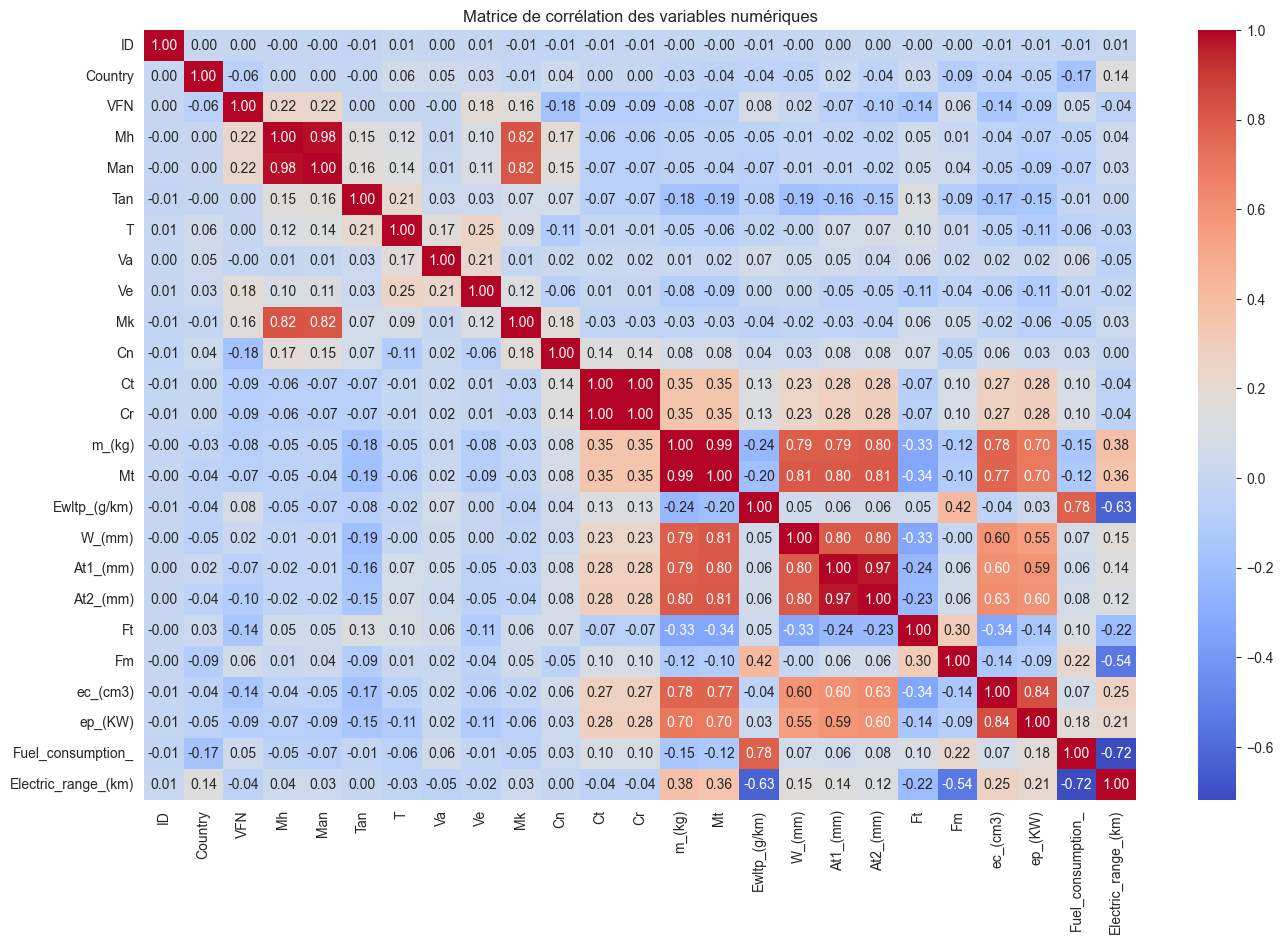

In [10]:
import seaborn as sns
corr = clean_train.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation des variables numériques")
plt.show()


On va garder uniquement les variables avec une corrélation ≥ 0

In [11]:
correlations = clean_train.corr()["Ewltp_(g/km)"]
positive_correlations = correlations[abs(correlations) > 0.2].index.tolist()
clean_train_filtered = clean_train[positive_correlations]

In [ ]:
clean_train_filtered

## Etape 2 : application du modèle

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
X = clean_train_filtered.drop("Ewltp_(g/km)", axis=1)
y = clean_train_filtered["Ewltp_(g/km)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
print("split fait")
model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=0)
model.fit(X_train, y_train)
print("fit fait")

split fait
fit fait


In [13]:
y_pred = model.predict(X_test)
print("predict fait")
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

predict fait
Mean Absolute Error: 4.234790883546916


In [18]:
clean_train_filtered

,m_(kg),Mt,Ewltp_(g/km),Fm,Fuel_consumption_,Electric_range_(km)
0,1387.0,1534.000000,401.053306,3,5.600000,0.0
1,1172.0,1337.000000,394.684459,4,5.500000,0.0
2,1204.0,1335.000000,398.561951,4,5.600000,0.0
3,1438.0,1588.000000,479.470056,4,6.800000,0.0
4,1207.0,1350.000000,421.854820,4,5.900000,0.0
...,...,...,...,...,...,...
7571644,1815.0,2006.000000,481.847421,3,5.900000,0.0
7571645,1815.0,2028.000000,486.397483,3,5.900000,0.0
7571646,1815.0,2006.000000,487.868524,3,5.900000,0.0
7571647,1240.0,1341.520708,350.795221,0,6.200000,0.0


In [20]:
var_exp = positive_correlations.copy()
var_exp.remove("Ewltp_(g/km)")

In [26]:
clean_test_filtered = clean_test[var_exp]

In [27]:
cat_col = clean_test_filtered.select_dtypes(include=['object'])
for col in cat_col :
    clean_test_filtered[col] = encoder.transform(clean_test_filtered[col])

/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_15414/1581074809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_test_filtered[col] = encoder.transform(clean_test_filtered[col])


In [28]:
pred_test = model.predict(clean_test_filtered)

In [32]:
sub = clean_test[["ID", 'ec_(cm3)']]
sub["Ewltp (g/km)"] = pred_test
sub.drop(columns=['ec_(cm3)'], inplace=True)
sub.to_csv("../data/sample_submission3.csv", index=False)

/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_15414/2709778978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub["Ewltp (g/km)"] = pred_test
/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_15414/2709778978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.drop(columns=['ec_(cm3)'], inplace=True)
